In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
df=pd.read_csv("multiple_linear_regression.csv")
df

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
df.info

<bound method DataFrame.info of      Feature 1  Feature 2  Feature 3  Target
0        230.1       37.8       69.2    22.1
1         44.5       39.3       45.1    10.4
2         17.2       45.9       69.3     9.3
3        151.5       41.3       58.5    18.5
4        180.8       10.8       58.4    12.9
..         ...        ...        ...     ...
195       38.2        3.7       13.8     7.6
196       94.2        4.9        8.1     9.7
197      177.0        9.3        6.4    12.8
198      283.6       42.0       66.2    25.5
199      232.1        8.6        8.7    13.4

[200 rows x 4 columns]>

In [14]:
df.describe

<bound method NDFrame.describe of      Feature 1  Feature 2  Feature 3  Target
0        230.1       37.8       69.2    22.1
1         44.5       39.3       45.1    10.4
2         17.2       45.9       69.3     9.3
3        151.5       41.3       58.5    18.5
4        180.8       10.8       58.4    12.9
..         ...        ...        ...     ...
195       38.2        3.7       13.8     7.6
196       94.2        4.9        8.1     9.7
197      177.0        9.3        6.4    12.8
198      283.6       42.0       66.2    25.5
199      232.1        8.6        8.7    13.4

[200 rows x 4 columns]>

In [16]:
output_col = "Target" 

In [19]:
x = df.iloc[:, df.columns != output_col]
#x = data.iloc[:, [0, 1]]

In [26]:
data =  df

In [27]:
y = data.loc[:, output_col]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [29]:
x_train

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
predicted_value = lr.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)
cost

2.2412862530933473

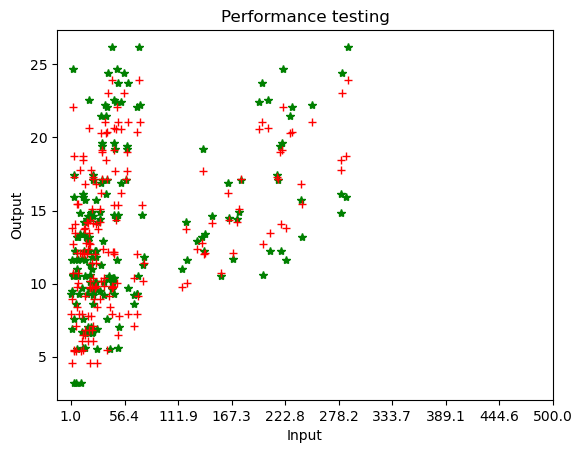

In [34]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

In [35]:
x_with_constant = sm.add_constant(x_train)

In [36]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [37]:
model = sm.OLS(y_train, x_with_constant)

In [39]:
result = model.fit()
result

In [40]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           1.67e-63
Time:                        23:48:35   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0